# Testing Exercises

In this exercise there is no additional coding required. All code has been provided and you are only expected to look and do some small calculations based on the actions of the gates that we have learnt during the class and learning exercises.

In [2]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import random_statevector


C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


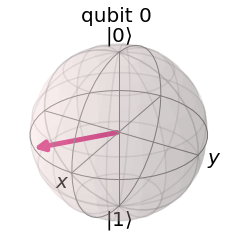

In [3]:
  # We want to teleport a random quantum state
  # So first, we need to define what this random state is
psi = random_statevector(2)
plot_bloch_multivector(psi)

## Teleportation Circuit
The following code block creates a teleportation circuit and presents it as a drawing. You do not need to know everything in this block but it is provided so you can see the purpose of the previous learning exercises.

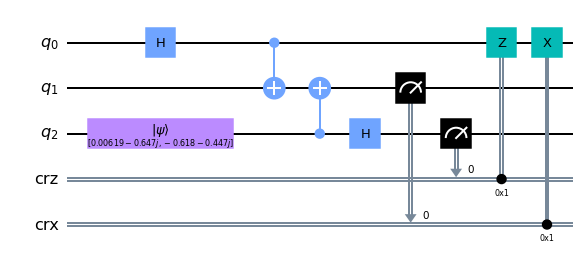

In [4]:
  # Now reate the "hardware" of our quantum computer
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)  # Putting them all together in one "circuit"
teleportation_circuit.initialize(psi, 2)  # Initialise the state of the qubit that we wish to teleport
  # Apply Hadamard gate to the first qubit (0)
teleportation_circuit.h(0)
  # Apply cNOT gate with first as a control
teleportation_circuit.cx(0,1)
  # At this point, we have a bell state.
  # Now we apply the reverse (decoder), but to the second and third qubits
teleportation_circuit.cx(2,1)
teleportation_circuit.h(2)  # Q: Is this the only order we can apply this?
  # Now Bob measures both his qubits (1 and 2) and sends results to Alice (0)
teleportation_circuit.measure(2,0)  # Measure qubit 1 and send the result to "classical bit" 0
teleportation_circuit.measure(1,1)  # Measure qubit 2 and send the result to "classical bit" 1
  # Now Alice applies gates depending on Bobs outcomes
teleportation_circuit.z(0).c_if(crz, 1) # Apply gates if the registers require, (this is to "extract" the teleported information)
teleportation_circuit.x(0).c_if(crx, 1)
teleportation_circuit.draw('mpl')

<b> After each gate in the above drawing, what is the state of the three qubits, assuming the initial state is 000, (i.e. ignoring the purple gate which is initialising the state we want to teleport)


The following code block runs simulations of our teleportation circuit. The output of this is the state vector of each three qubits as well as a histogram of the "average" final state.

C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


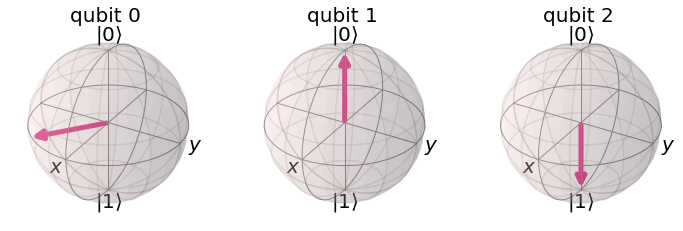

In [5]:
sim = Aer.get_backend('qasm_simulator')  # Define our simulation method
teleportation_circuit.save_statevector() # Tell the simulation to save the state vector as we run it
result = sim.run(teleportation_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(teleportation_circuit)
teleportation_circuit.reset(qubit=qr)  # Reset the circuit ready for the next run
plot_bloch_multivector(out_vector)


<b> Compare the above state vectors for qubits 0, 1 and 2 respectivly, with the state vector initialised on qubit 2 at the start of the circuit. Notice how the state has "teleported" from qubit 2 to qubit 0. Why did it teleport to qubit 0 instead of qubit 1?

C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


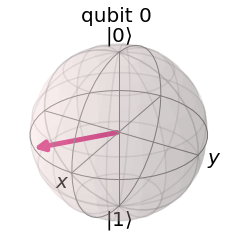

In [6]:
plot_bloch_multivector(psi)

Below you will see a histogram of the measurement results from the circuit, (the information that Alice sends to Bob so he may construct the teleported states). 

<b> What does it mean that each outcome is equally likely?

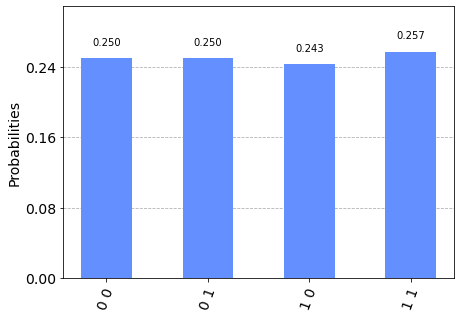

In [7]:
plot_histogram(counts)

# Super Dense Coding
The following code block creates a circuit capable of execuitng super dense encoding. Although we have not seen this circuit before, we have all the tools required to fully understand what is going on. Alice and Bob each have their own qubit which have a H and CX gate applied on them, (as seen in the learning exercises). Alice then "encodes her two bits of information in her qubit by either applying an X or a Z gate to her qubit. Then, Alices qubit is sent back to Bob and a CX and H gate are applied on the two qubits. When Bob measures both qubits he will measure Alice's intened message; two bits of information have been sent in one qubit!

While there is still no coding expected, it would be useful to see how this circuit works by changing Alice's message. You can do this in the code block below.

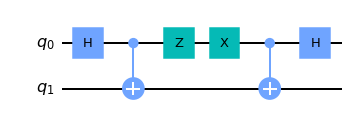

In [47]:
  # Create the "hardware" of our quantum computer
qr_super_dense = QuantumRegister(2, name="q")    # Protocol uses 3 qubits
superdense_circuit = QuantumCircuit(qr_super_dense)  # Putting them all together in one "circuit"
  # Apply Hadamard gate to the first qubit (0)
superdense_circuit.h(0)
  # Apply cNOT gate with first as a control
superdense_circuit.cx(0,1)
  # At this point, we have a bell state.
  # Now we want Alice to encode her "message" in her first qubit

### CHANGE ALICE'S MESSAGE
Alice_message = [1,1]  # Other possible messages are 00: [0,0] 01: [0,1] and 10: [1,0]
### CHANGE ALICE'S MESSAGE
if Alice_message[0] == 1:
    superdense_circuit.z(0)
if Alice_message[1] == 1:
    superdense_circuit.x(0)




  # Now we apply the reverse (decoder), but to the second and third qubits
superdense_circuit.cx(0,1)
superdense_circuit.h(0)
superdense_circuit.draw('mpl')

The following code block runs simulations of our super dense coding circuit. The output of this is the state vector of both qubits.
<b> If Alice's message is: 00, 01, 10, 11, what is the state of qubits q0q1 at each stage of this circuit?

C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


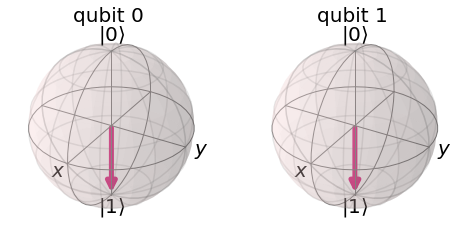

In [48]:
superdense_circuit.save_statevector() # Tell the simulation to save the state vector as we run it
result = sim.run(superdense_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(superdense_circuit)
superdense_circuit.reset(qubit=qr_super_dense)  # Reset the circuit ready for the next run
plot_bloch_multivector(out_vector)
